In [1]:
# In this project we are going to analyze the dataset of Issues from Github that uses ChatGPT to review the PR's'

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# missing_values = ["N/A", "na", "--", "-"] # TODO: Please add more garbage data there

json_directory = 'github_dataset'

# List all JSON files in the directory
json_files = [file for file in os.listdir(json_directory) if file.endswith(".json")]

# List to store DataFrames
dataframes = []

# Loop through JSON files and read them into DataFrames
for file in json_files:
    file_path = os.path.join(json_directory, file)
    print(file_path)
    with open(file_path, 'r') as json_file:
        data = pd.read_json(json_file)
        dataframes.append(data)

# Concatenate DataFrames into a single DataFrame (optional)
data = pd.concat(dataframes, ignore_index=True)


# Load the data file
# data = pd.read_json('20230914_083202_commit_sharings.json')
refactoring_df = pd.json_normalize(data["Sources"])

print("The data set has {} rows and {} columns".format(refactoring_df.shape[0], refactoring_df.shape[1]))

display(refactoring_df.head(200))  # top rows of the refactoring commit data
display(refactoring_df.dtypes.value_counts())  # data types of the columns


# Based on the initial analysis, we have 10 columns which are object type i.e. they contain categorical data 
# and 2 remaining columns which are of int data type


github_dataset\20230727_195927_pr_sharings.json
github_dataset\20230727_195941_issue_sharings.json
github_dataset\20230803_093947_pr_sharings.json
github_dataset\20230803_094705_issue_sharings.json
github_dataset\20230810_123110_pr_sharings.json
github_dataset\20230810_123938_issue_sharings.json
github_dataset\20230817_125147_pr_sharings.json
github_dataset\20230817_130502_issue_sharings.json
github_dataset\20230824_100450_pr_sharings.json
github_dataset\20230824_101836_issue_sharings.json
github_dataset\20230831_060603_pr_sharings.json
github_dataset\20230831_061759_issue_sharings.json
github_dataset\20230907_091631_pr_sharings.json
github_dataset\20230907_092956_issue_sharings.json
github_dataset\20230914_074826_pr_sharings.json
github_dataset\20230914_080417_issue_sharings.json
The data set has 4000 rows and 20 columns


,Type,URL,Author,RepoName,RepoLanguage,Number,Title,Body,CreatedAt,ClosedAt,MergedAt,UpdatedAt,State,Additions,Deletions,ChangedFiles,CommitsTotalCount,CommitShas,ChatgptSharing,CommitSha
0,pull request,https://github.com/labdao/plex/pull/469,AdamGoyer,labdao/plex,Go,469,add readme for openbabel to PLEX,The Chatgpt Thread used to create this pull re...,2023-07-05T03:30:54Z,None,None,2023-07-05T03:30:59Z,OPEN,42.0,0.0,1.0,1.0,[a41124a8d7f8d54d68b777bd3781734188d35873],[{'URL': 'https://chat.openai.com/share/8bd338...,NaN
1,pull request,https://github.com/labdao/plex/pull/468,AdamGoyer,labdao/plex,Go,468,add readme for Gnina #462,Link to the ChatGPT conversation used to creat...,2023-07-05T02:53:12Z,None,None,2023-07-05T04:20:31Z,OPEN,45.0,0.0,1.0,1.0,[8199fe4135efd1500e3dc5c868048aa3cf118cb4],[{'URL': 'https://chat.openai.com/share/2c4b0d...,NaN
2,pull request,https://github.com/ActivityWatch/aw-webui/pull...,ErikBjare,ActivityWatch/aw-webui,Vue,455,feat: improved categorization helper to includ...,Came up with this while thinking about the bug...,2023-06-22T15:47:50Z,None,None,2023-06-22T15:52:32Z,OPEN,78.0,19.0,1.0,1.0,[c93f546f2b9d2b97a6f340d4a1859f2aa80fd0a7],[{'URL': 'https://chat.openai.com/share/0c7588...,NaN
3,pull request,https://github.com/open-learning-exchange/mypl...,Okuro3499,open-learning-exchange/myplanet,Java,2229,adding French to strings (fixes #2216),this pull request contains french translations...,2023-07-20T14:16:56Z,2023-07-24T10:20:08Z,2023-07-24T10:20:08Z,2023-07-24T10:41:16Z,MERGED,789.0,789.0,3.0,5.0,"[addd73142e988aae5ece154537a3a62fea0b8416, 763...",[{'URL': 'https://chat.openai.com/share/be516f...,NaN
4,pull request,https://github.com/sleepyRias/RASandbox/pull/76,Multi538,sleepyRias/RASandbox,Vue,76,72 router,,2023-07-24T15:04:07Z,None,None,2023-07-24T15:54:59Z,OPEN,108.0,25.0,5.0,7.0,"[e2b47280b45d47ed76a1134d51ebbbe989548b1b, 824...",[{'URL': 'https://chat.openai.com/share/d2809b...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,issue,https://github.com/deep-foundation/deepcase-ap...,Konard,deep-foundation/deepcase-app,TypeScript,119,"Center menu does not center links, but puts th...",![59A7122E-7E1C-42DB-AFF2-529E167AFC78](https:...,2023-04-17T21:07:26Z,None,NaN,2023-07-16T06:18:15Z,OPEN,NaN,NaN,NaN,NaN,NaN,[{'URL': 'https://chat.openai.com/share/8d9884...,NaN
196,issue,https://github.com/Ratescale/spaceweather/issu...,rensanrenren,Ratescale/spaceweather,Python,5,プラン1: OSMと地理院地図から送電網データセットを取得してMapbox Studioにプ...,やり方まとめましょう,2023-06-01T17:20:40Z,None,NaN,2023-06-01T17:21:26Z,OPEN,NaN,NaN,NaN,NaN,NaN,[{'URL': 'https://chat.openai.com/share/4d816a...,NaN
197,issue,https://github.com/Ratescale/Satellite-Instrum...,rensanrenren,Ratescale/Satellite-Instrument-Info-Manager,Python,2,データ収集と管理の仕組みの構築,## データ収集と管理の仕組みの構築\r\n\r\n1. **データ収集スクリプトの作成**...,2023-06-02T09:53:48Z,None,NaN,2023-06-02T11:40:15Z,OPEN,NaN,NaN,NaN,NaN,NaN,[{'URL': 'https://chat.openai.com/share/f00122...,NaN
198,issue,https://github.com/multitheftauto/mtasa-blue/i...,CrosRoad95,multitheftauto/mtasa-blue,C++,3056,Suggestion: add option to specify screen on wh...,### Is your feature request related to a probl...,2023-06-04T15:34:16Z,None,NaN,2023-06-04T15:34:16Z,OPEN,NaN,NaN,NaN,NaN,NaN,[{'URL': 'https://chat.openai.com/share/ea8065...,NaN


object     15
float64     4
int64       1
dtype: int64

In [4]:
refactoring_df.dtypes == 'object'  # showing the columns with object data type


Type                  True
URL                   True
Author                True
RepoName              True
RepoLanguage          True
Number               False
Title                 True
Body                  True
CreatedAt             True
ClosedAt              True
MergedAt              True
UpdatedAt             True
State                 True
Additions            False
Deletions            False
ChangedFiles         False
CommitsTotalCount    False
CommitShas            True
ChatgptSharing        True
CommitSha             True
dtype: bool

In [5]:
"""
As a part of the data cleaning process, we will perform the following four steps:

1. Remove the duplicate rows

2. Finding how many columns have missing data and in what quantity?

3. Replace missing fields with alternative values, For ex: RepoLanguage==None will be replace with RepoLanguage==Multiple Languages

"""

'\nAs a part of the data cleaning process, we will perform the following four steps:\n\n1. Remove the duplicate rows\n\n2. Finding how many columns have missing data and in what quantity?\n\n3. Replace missing fields with alternative values, For ex: RepoLanguage==None will be replace with RepoLanguage==Multiple Languages\n\n'

In [6]:
# Removing the duplicate rows
# refactoring_df.drop_duplicates()

In [7]:
# checking the nan/null values in the data
refactoring_df.isnull().sum().sort_values(ascending=False)


# As we can see that there are 
#     1. 122 rows with missing data in the `RepoLanguage` field and 
#     2. 100 rows with missing data in the `MergedAt` field
#     3. 79 rows with missing data in the `ClosedAt` field

CommitSha            3341
CommitShas           3233
MergedAt             2920
CommitsTotalCount    2574
ChangedFiles         2574
Deletions            2574
Additions            2574
ClosedAt             1561
RepoLanguage          368
UpdatedAt               0
State                   0
ChatgptSharing          0
CreatedAt               0
Body                    0
Title                   0
Number                  0
RepoName                0
Author                  0
URL                     0
Type                    0
dtype: int64

In [8]:
refactoring_df.dropna(axis = 0, subset = ['ChatgptSharing'], how = 'any', inplace=True)

print("The filtered data set has {} rows and {} columns".format(refactoring_df.shape[0], refactoring_df.shape[1]))

The filtered data set has 4000 rows and 20 columns


In [9]:
# For missing `RepoLanguage` field, we are forming it using `Multiple language` as we have checked that multiple programming
# languages are being used in certain repositories and their RepoLanguage is not set, So by default their value is None.

# Define a function to fill null values in 'RepoLanguage' column
def replace_repoLanguage_func(row):    
    if pd.isnull(row['RepoLanguage']):
        return "Multiple Languages"
    
    return row['RepoLanguage']
    
def replace_closedAt_func(row):
    if pd.isnull(row['ClosedAt']):
        return "0000-00-00T00:00:00Z"
    
    return row['ClosedAt']
    
	
# # Apply the lambda function to update the 'None' column
refactoring_df['RepoLanguage'] = refactoring_df.apply(replace_repoLanguage_func, axis=1)
refactoring_df['ClosedAt'] = refactoring_df.apply(replace_closedAt_func, axis=1)

refactoring_df.isnull().sum().sort_values(ascending=False)


CommitSha            3341
CommitShas           3233
MergedAt             2920
CommitsTotalCount    2574
ChangedFiles         2574
Deletions            2574
Additions            2574
Title                   0
URL                     0
Author                  0
RepoName                0
RepoLanguage            0
Number                  0
ClosedAt                0
Body                    0
CreatedAt               0
ChatgptSharing          0
UpdatedAt               0
State                   0
Type                    0
dtype: int64

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Initialize NLTK stopwords
stop_words = set(stopwords.words('english'))

def processChatGptSharing_tokenization(row):
    chatgptsharing = str(row['ChatgptSharing'])
    # Tokenization and stopword removal for chatgptsharing
    word_tokens = word_tokenize(chatgptsharing)
    filtered_tokens = [word for word in word_tokens if word.lower() not in stop_words]

    # Convert the filtered tokens back to a string
    chatgptsharing_filtered = ' '.join(filtered_tokens)
    return chatgptsharing_filtered

refactoring_df['ChatgptSharing'] = refactoring_df.apply(processChatGptSharing_tokenization, axis=1)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dwars\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dwars\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [47]:
import re

# Define regular expressions for bug categories
bug_categories = {
    "Null Pointer Exception": re.compile(r"(?i)null pointer|NPE"),
    "String Exception": re.compile(r"(?i)string (index|out of range)|stringexception"),
    "Division by Zero": re.compile(r"(?i)division by zero|divide by zero|zerodivision"),
    "Memory Leak": re.compile(r"(?i)memory leak|leaked memory|memory leak detected"),
    "File Not Found": re.compile(r"(?i)file not found|file not found exception"),
    "Index Out of Bounds": re.compile(r"(?i)index out of bounds|out of bounds"),
    "Type Error": re.compile(r"(?i)type error|type mismatch|typeerror"),
    "Logic Error": re.compile(r"(?i)logic error|logical error|inconsistent logic"),
    "Performance Issue": re.compile(r"(?i)performance issue|performance problem|slow performance"),
    "Security Vulnerability": re.compile(r"(?i)security issue|security vulnerability|security problem"),
    "Compatibility Issue": re.compile(r"(?i)compatibility issue|compatibility problem|incompatibility"),
    "Race Condition": re.compile(r"(?i)race condition|concurrency issue|race hazard"),
    "Deadlock": re.compile(r"(?i)deadlock|deadly embrace|deadly embrace condition"),
    "Infinite Loop": re.compile(r"(?i)infinite loop|endless loop|looping indefinitely"),
    "Resource Leak": re.compile(r"(?i)resource leak|resource leakage|resource not released"),
    "Data Corruption": re.compile(r"(?i)data corruption|corrupted data|data integrity issue"),
    "Timeout Error": re.compile(r"(?i)timeout error|timed out|exceeded timeout"),
}

bug_category_counts = {category: 0 for category in bug_categories}

dfs = []
for index, item in refactoring_df.iterrows():
    repositoryName = str(item['RepoName'])
    userName = str(item['Author'])
    number =item['Number']
    body = str(item['Body'])
    title = str(item['Title'])
    chatgptsharing = str(item['ChatgptSharing'])

    review_text = f"{title} {body} {chatgptsharing}"
    bugCategory = ""
    
    for category, pattern in bug_categories.items():
        count = len(pattern.findall(review_text))
        bug_category_counts[category] += count
        if count>0:
            if len(bugCategory)>0:
                bugCategory = bugCategory+","+category
            else:
                bugCategory = category
        
    data = {
        "Title": [title],
        "URL": [str(item['URL'])],
        "Author": [userName],
        "RepoName": [repositoryName],
        "RepoLanguage": [str(item['RepoLanguage'])],
        "Number": [number],
        "ClosedAt": [str(item['ClosedAt'])],
        "Body": [body],
        "CreatedAt": [str(item['CreatedAt'])],
        "ChatGptSharing": [chatgptsharing],
        "UpdatedAt": [str(item['UpdatedAt'])],
        "State": [str(item['State'])],
        "Type": [str(item['Type'])],
        "Bug": [bugCategory],
    }

    labeled_df = pd.DataFrame(data)

    # Append the DataFrame to the list of DataFrames
    dfs.append(labeled_df)


# Print the bug category counts
for category, count in bug_category_counts.items():
    if count > 0:
        print(f"{category}: {count} mention(s)")
        

Null Pointer Exception: 1696 mention(s)
Memory Leak: 12 mention(s)
Index Out of Bounds: 2 mention(s)
Type Error: 2474 mention(s)
Logic Error: 58 mention(s)
Performance Issue: 322 mention(s)
Security Vulnerability: 114 mention(s)
Compatibility Issue: 506 mention(s)
Race Condition: 350 mention(s)
Deadlock: 196 mention(s)
Infinite Loop: 380 mention(s)
Data Corruption: 40 mention(s)
Timeout Error: 192 mention(s)


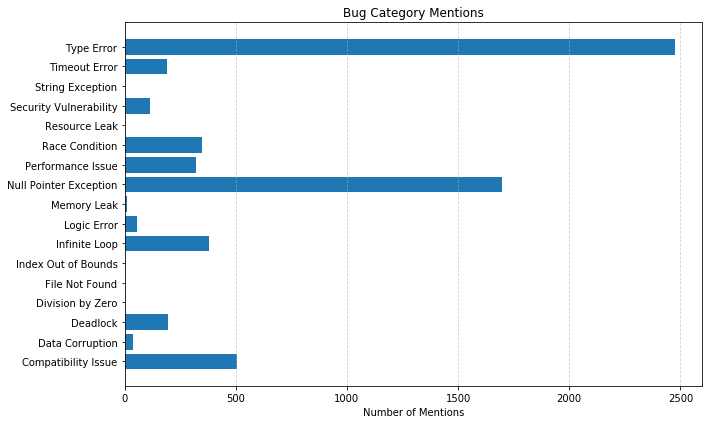

In [13]:
# Plot the bug category counts as a bar chart
categories = list(bug_category_counts.keys())
counts = list(bug_category_counts.values())
plt.figure(figsize=(10, 6))
plt.barh(categories, counts)
plt.xlabel("Number of Mentions")
plt.title("Bug Category Mentions")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [64]:
merged_df = pd.concat(dfs, ignore_index=True)
//Add Code here to display count before duplicates.
merged_df = merged_df.drop_duplicates()
//Add Code here to display count after removing duplicates.
display(merged_df.head(2000))

,Title,URL,Author,RepoName,RepoLanguage,Number,ClosedAt,Body,CreatedAt,ChatGptSharing,UpdatedAt,State,Type,Bug
0,add readme for openbabel to PLEX,https://github.com/labdao/plex/pull/469,AdamGoyer,labdao/plex,Go,469,0000-00-00T00:00:00Z,The Chatgpt Thread used to create this pull re...,2023-07-05T03:30:54Z,[ { 'URL ' : 'https : //chat.openai.com/share/...,2023-07-05T03:30:59Z,OPEN,pull request,
1,add readme for Gnina #462,https://github.com/labdao/plex/pull/468,AdamGoyer,labdao/plex,Go,468,0000-00-00T00:00:00Z,Link to the ChatGPT conversation used to creat...,2023-07-05T02:53:12Z,[ { 'URL ' : 'https : //chat.openai.com/share/...,2023-07-05T04:20:31Z,OPEN,pull request,
2,feat: improved categorization helper to includ...,https://github.com/ActivityWatch/aw-webui/pull...,ErikBjare,ActivityWatch/aw-webui,Vue,455,0000-00-00T00:00:00Z,Came up with this while thinking about the bug...,2023-06-22T15:47:50Z,[ { 'URL ' : 'https : //chat.openai.com/share/...,2023-06-22T15:52:32Z,OPEN,pull request,
3,adding French to strings (fixes #2216),https://github.com/open-learning-exchange/mypl...,Okuro3499,open-learning-exchange/myplanet,Java,2229,2023-07-24T10:20:08Z,this pull request contains french translations...,2023-07-20T14:16:56Z,[ { 'URL ' : 'https : //chat.openai.com/share/...,2023-07-24T10:41:16Z,MERGED,pull request,
4,72 router,https://github.com/sleepyRias/RASandbox/pull/76,Multi538,sleepyRias/RASandbox,Vue,76,0000-00-00T00:00:00Z,,2023-07-24T15:04:07Z,[ { 'URL ' : 'https : //chat.openai.com/share/...,2023-07-24T15:54:59Z,OPEN,pull request,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,Execute groovy script,https://github.com/enoong/qupath-extension-neu...,jayy-ahn,enoong/qupath-extension-neuror,Java,3,2023-08-06T16:21:05Z,Execute script without opening Script Editor i...,2023-07-25T07:16:23Z,[ { 'URL ' : 'https : //chat.openai.com/share/...,2023-08-06T16:21:05Z,CLOSED,issue,
2096,The stable branch should start out pointing to...,https://github.com/simonw/simonw-readthedocs-e...,simonw,simonw/simonw-readthedocs-experiments,Multiple Languages,2,2023-08-21T04:26:25Z,I just realized that adding this to a new repo...,2023-08-21T04:05:56Z,[ { 'URL ' : 'https : //chat.openai.com/share/...,2023-08-21T04:26:25Z,CLOSED,issue,
2097,feat: support the sharing page,https://github.com/pionxzh/chatgpt-exporter/is...,pionxzh,pionxzh/chatgpt-exporter,TypeScript,147,2023-06-08T15:21:53Z,ChatGPT recently add a new feature which allow...,2023-05-26T19:49:11Z,[ { 'URL ' : 'https : //chat.openai.com/share/...,2023-06-08T15:21:53Z,CLOSED,issue,
2098,TypeScriptの配列参照は厳密にはundefinedableなので至るところで不明な挙...,https://github.com/VOICEVOX/voicevox/issues/650,Hiroshiba,VOICEVOX/voicevox,TypeScript,650,0000-00-00T00:00:00Z,## 内容\r\n\r\ntypescriptのarrayやmapは、範囲外のindexやk...,2022-01-20T17:38:27Z,[ { 'URL ' : 'https : //chat.openai.com/share/...,2023-07-23T16:14:47Z,OPEN,issue,


In [90]:
import sqlite3
import datetime
# Connect to or create an SQLite database
conn = sqlite3.connect('my_database.db')

# Create a cursor
cursor = conn.cursor()

cursor.execute('DROP TABLE github_labeled_table')
# Create a table
cursor.execute('''CREATE TABLE IF NOT EXISTS github_labeled_table (
                     Id TEXT,
                     ClosedAt TEXT,
                     UpdatedAt TEXT,
                     CreatedAt TEXT,
                     ChatgptSharing TEXT,
                     State TEXT,
                     Body TEXT,
                     Title TEXT,
                     Type TEXT,
                     Number INTEGER,
                     RepoLanguage TEXT,
                     RepoName TEXT,
                     Author TEXT,
                     URL TEXT,
                     Bug TEXT
                 )''')

# Insert data into the table
for index, item in merged_df.iterrows():
    Id = str(item['RepoName'])+"_"+str(item['Type']).replace(" ","")+"_"+str(item['Number'])
    ClosedAt = str(item['ClosedAt'])
    UpdatedAt = str(item['UpdatedAt'])
    CreatedAt = str(item['CreatedAt'])
    ChatgptSharing = str(item['ChatGptSharing'])
    State = str(item['State'])
    Body = str(item['Body'])
    Title = str(item['Title'])
    Type = str(item['Type'])
    Number = item['Number']
    RepoLanguage = str(item['RepoLanguage'])
    RepoName = str(item['RepoName'])
    Author = str(item['Author'])
    URL = str(item['URL'])
    Bug = str(item['Bug'])
    cursor.execute('INSERT INTO github_labeled_table(Id,ClosedAt,ChatgptSharing,State,UpdatedAt,CreatedAt,Body,Title,Type,Number,RepoLanguage,RepoName,Author,URL,Bug) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)',(Id, ClosedAt, ChatgptSharing,State,UpdatedAt,CreatedAt,Body,Title,Type,Number,RepoLanguage,RepoName,Author,URL,Bug))


# Commit changes
conn.commit()

# Close the connection
conn.close()

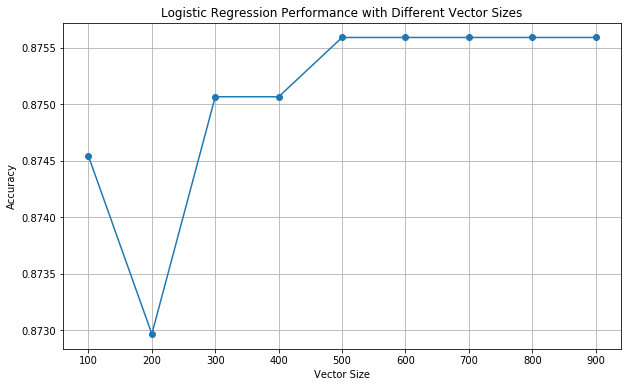

F:\software\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\software\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\software\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Accuracy: 87.56%

Classification Report:
                                                             precision    recall  f1-score   support

                                                                  0.87      1.00      0.93      1641
                                        Compatibility Issue       1.00      0.13      0.23        23
                         Compatibility Issue,Race Condition       0.00      0.00      0.00         3
                                            Data Corruption       0.00      0.00      0.00         1
                                                   Deadlock       0.00      0.00      0.00         7
                                     Deadlock,Infinite Loop       0.00      0.00      0.00         6
                                              Infinite Loop       0.00      0.00      0.00        18
                                                Logic Error       0.00      0.00      0.00         1
                                                M

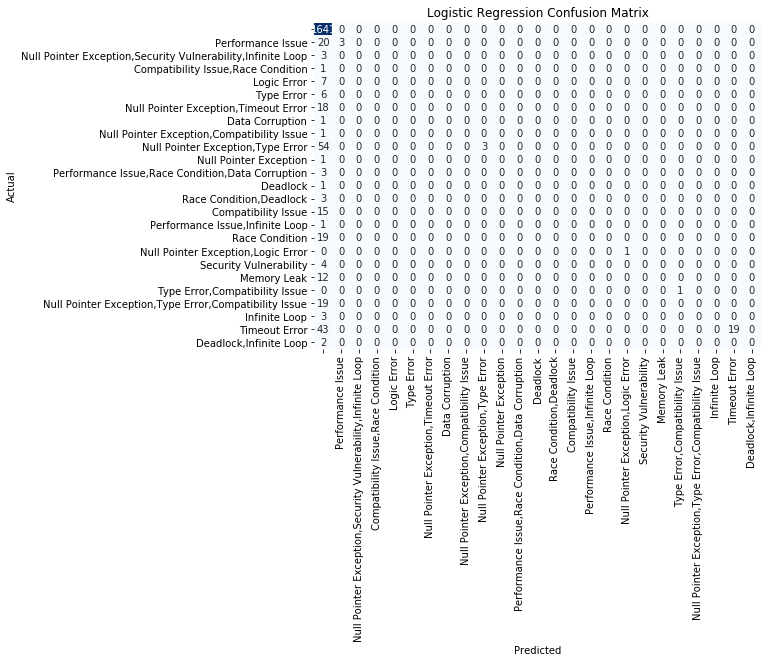

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

merged_df = merged_df.dropna(subset=["Body"])
merged_df = merged_df[merged_df["Body"].apply(lambda x: isinstance(x, str))]

# Split the dataset into features (X) and the target variable (y)
X = merged_df["Body"]  # Using the "Title" column as the input feature
y = merged_df["Bug"]  # Assuming "BugCategory" contains bug category labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50,train_size=0.50, random_state=42)

vector_sizes = range(100, 1000, 100)

accuracy_scores = []

for vector_size in vector_sizes:
    # Create a TF-IDF vectorizer to convert text data to numerical features
    vectorizer = TfidfVectorizer(max_features=vector_size)  # You can adjust the number of features as needed

    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Initialize and train a logistic regression classifier
    clf = LogisticRegression(max_iter=1000)  # You may need to increase the max_iter based on your data
    clf.fit(X_train_tfidf, y_train)

    # Make predictions on the testing data
    y_pred = clf.predict(X_test_tfidf)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(vector_sizes, accuracy_scores, marker='o', linestyle='-')
plt.title('Logistic Regression Performance with Different Vector Sizes')
plt.xlabel('Vector Size')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# Create a TF-IDF vectorizer to convert text data to numerical features
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features as needed

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train a logistic regression classifier
clf = LogisticRegression(max_iter=1000)  # You may need to increase the max_iter based on your data
clf.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix_lr = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_rep)

unique_labels_lr = set(y_test).union(set(y_pred))

# Create a DataFrame from the confusion matrix
df_confusion_lr = pd.DataFrame(conf_matrix_lr, index=unique_labels_lr, columns=unique_labels_lr)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_confusion_lr, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

F:\software\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\software\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\software\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Accuracy: 87.66%

Classification Report:
                                                             precision    recall  f1-score   support

                                                                  0.88      0.99      0.93      1641
                                        Compatibility Issue       0.80      0.17      0.29        23
                         Compatibility Issue,Race Condition       0.60      1.00      0.75         3
                                            Data Corruption       0.00      0.00      0.00         1
                                                   Deadlock       1.00      0.43      0.60         7
                                     Deadlock,Infinite Loop       0.00      0.00      0.00         6
                                              Infinite Loop       1.00      0.22      0.36        18
                                                Logic Error       0.00      0.00      0.00         1
                                                M

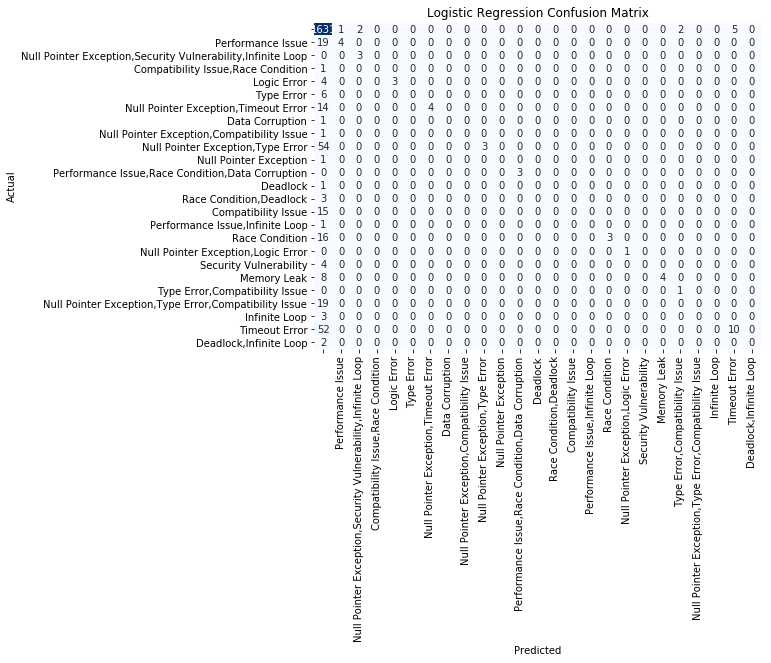

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df has been loaded with the data

# Drop rows with NaN values in the "Title" column
merged_df = merged_df.dropna(subset=["Body"])
merged_df = merged_df[merged_df["Body"].apply(lambda x: isinstance(x, str))]

# Split the dataset into features (X) and the target variable (y)
X = merged_df["Body"]  # Using the "Title" column as the input feature
y = merged_df["Bug"]  # Assuming "BugCategory" contains bug category labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, train_size=0.50, random_state=42)

# Tokenize the sentences into words
X_train_tokens = [sentence.split() for sentence in X_train]
X_test_tokens = [sentence.split() for sentence in X_test]

# Average the word vectors for each sentence
def average_word_vectors(words, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    n_words = 0
    for word in words:
        if word in model.wv.key_to_index:
            n_words += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if n_words:
        feature_vector = np.divide(feature_vector, n_words)
    return feature_vector

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=X_train_tokens + X_test_tokens, vector_size=100, window=5, min_count=1, workers=4)

X_train_w2v_avg = [average_word_vectors(sentence, word2vec_model, 100) for sentence in X_train_tokens]
X_test_w2v_avg = [average_word_vectors(sentence, word2vec_model, 100) for sentence in X_test_tokens]

# Initialize and train a logistic regression classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_w2v_avg, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test_w2v_avg)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix_lr = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_rep)

# Create a DataFrame from the confusion matrix
df_confusion_lr = pd.DataFrame(conf_matrix_lr, index=unique_labels_lr, columns=unique_labels_lr)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_confusion_lr, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


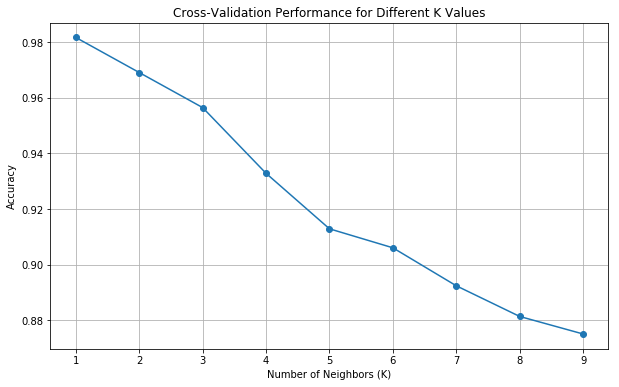

The best K value is 1 with an accuracy of 0.98


F:\software\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\software\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\software\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Accuracy: 98.16%

Classification Report:
                                                             precision    recall  f1-score   support

                                                                  0.99      0.99      0.99      1641
                                        Compatibility Issue       0.96      1.00      0.98        23
                         Compatibility Issue,Race Condition       1.00      1.00      1.00         3
                                            Data Corruption       1.00      1.00      1.00         1
                                                   Deadlock       1.00      1.00      1.00         7
                                     Deadlock,Infinite Loop       1.00      1.00      1.00         6
                                              Infinite Loop       1.00      0.72      0.84        18
                                                Logic Error       0.00      0.00      0.00         1
                                                M

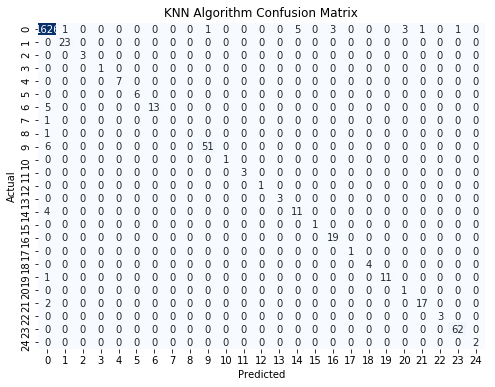

In [86]:
from sklearn.neighbors import KNeighborsClassifier

X_tfidf = vectorizer.fit_transform(X)

# Range of K values to test
k_values = range(1, 10)

# Lists to store cross-validation scores
cross_val_scores = []

# Perform cross-validation for different K values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_tfidf, y, cv=3, scoring='accuracy')
    cross_val_scores.append(scores.mean())

# Plot the cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, cross_val_scores, marker='o', linestyle='-')
plt.title('Cross-Validation Performance for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# Find the best K value
best_k = k_values[cross_val_scores.index(max(cross_val_scores))]
print(f'The best K value is {best_k} with an accuracy of {max(cross_val_scores):.2f}')

knn = KNeighborsClassifier(n_neighbors=best_k)
scores = cross_val_score(knn, X_tfidf, y, cv=3, scoring='accuracy')
accuracy = scores.mean()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix_knn = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_rep)

# Create a DataFrame from the confusion matrix
df_confusion_knn = pd.DataFrame(conf_matrix_knn, index=unique_labels_lr, columns=unique_labels_lr)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_confusion_knn, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('KNN Algorithm Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

F:\software\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\software\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\software\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Accuracy: 86.25%

Classification Report:
                                                             precision    recall  f1-score   support

                                                                  0.87      0.99      0.93      1641
                                        Compatibility Issue       1.00      0.13      0.23        23
                         Compatibility Issue,Race Condition       0.00      0.00      0.00         3
                                            Data Corruption       0.00      0.00      0.00         1
                                                   Deadlock       0.00      0.00      0.00         7
                                     Deadlock,Infinite Loop       0.00      0.00      0.00         6
                                              Infinite Loop       0.00      0.00      0.00        18
                                                Logic Error       0.00      0.00      0.00         1
                                                M

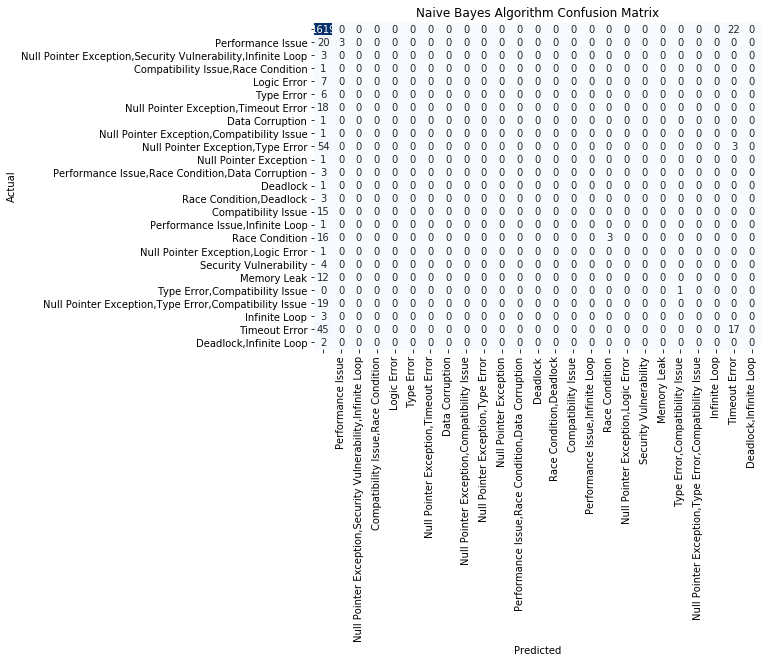

In [95]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_nb)
classification_rep = classification_report(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_rep)

# Create a DataFrame from the confusion matrix
df_confusion_nb = pd.DataFrame(conf_matrix_nb, index=unique_labels_lr, columns=unique_labels_lr)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_confusion_nb, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Naive Bayes Algorithm Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

F:\software\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\software\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\software\WinPython-64bit-3.6.3.0Qt5\python-3.6.3.amd64\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Accuracy: 97.74%

Classification Report:
                                                             precision    recall  f1-score   support

                                                                  0.98      1.00      0.99      1641
                                        Compatibility Issue       1.00      1.00      1.00        23
                         Compatibility Issue,Race Condition       1.00      1.00      1.00         3
                                            Data Corruption       1.00      1.00      1.00         1
                                                   Deadlock       1.00      1.00      1.00         7
                                     Deadlock,Infinite Loop       1.00      1.00      1.00         6
                                              Infinite Loop       1.00      0.44      0.62        18
                                                Logic Error       0.00      0.00      0.00         1
                                                M

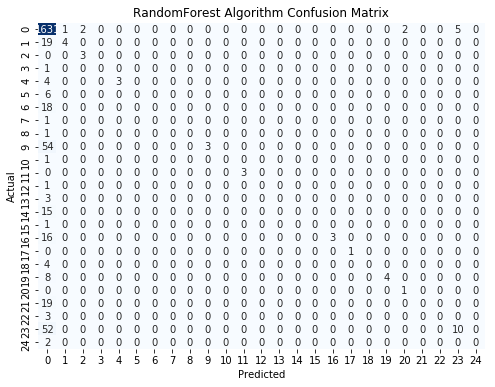

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
classification_rep = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_rep)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('RandomForest Algorithm Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()